This program performs topic modeling for the combined Title and Abstracts

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [1]:
%pip install bertopic
from bertopic import BERTopic

In [1]:
import pandas as pd
import numpy as np   

## Preprocess text for BerTopic modeling 

In [ ]:
#Read preprocessed abstracts

df_abstract = pd.read_csv('/results/abstracts_preprocessed.csv')
df_abstract = df_abstract[['PubYear','lemmatized_Abstract']]    #1750 by 2
df_title  = pd.read_csv('/results/titles_preprocessed.csv') 

df_title = df_title[['PubYear','lemmatized_Title']]    #1750 by 2

#create new df
dic_cols = { 'PubYear':df_abstract.PubYear, 
            'lemmatized_Abstract': df_abstract.lemmatized_Abstract,
            'lemmatized_Title': df_title.lemmatized_Title
}
df = pd.DataFrame.from_dict(dic_cols)

#drop rows if lemmatized_Abstract has nan
df = df.dropna(axis=0, subset=['lemmatized_Abstract'])   #gives 1627 by 3 

#combine lemmatized_Abstract and lemmatized_Title columns 
df['text'] = df[['lemmatized_Abstract', 'lemmatized_Title']].agg(lambda x: x.dropna().str.cat(sep=' '), axis=1)
all(isinstance(item, str) for item in df.text)  #True

#save this df
df.to_csv(path + '/results/df_combined_lemm_abst_title.csv')


## Train the model

In [5]:
data = pd.read_csv(path + '/Results/df_combined_lemm_abst_title.csv')
#get the combined text
abstracts = data.text.to_list()

#check if all items in abstracts are strings
print(all(isinstance(item, str) for item in abstracts))   #True

#get dates
timestamps = data.PubYear.to_list()


True


In [2]:
#train the model
topic_model = BERTopic(verbose=True, nr_topics="auto")
topics, probs = topic_model.fit_transform(abstracts)

## Check number of topics and their word scores

In [4]:

#save topics with frequency
topic_desc = topic_model.get_topic_info()

topic_desc.to_csv('/results/df_topics.csv', index = False)


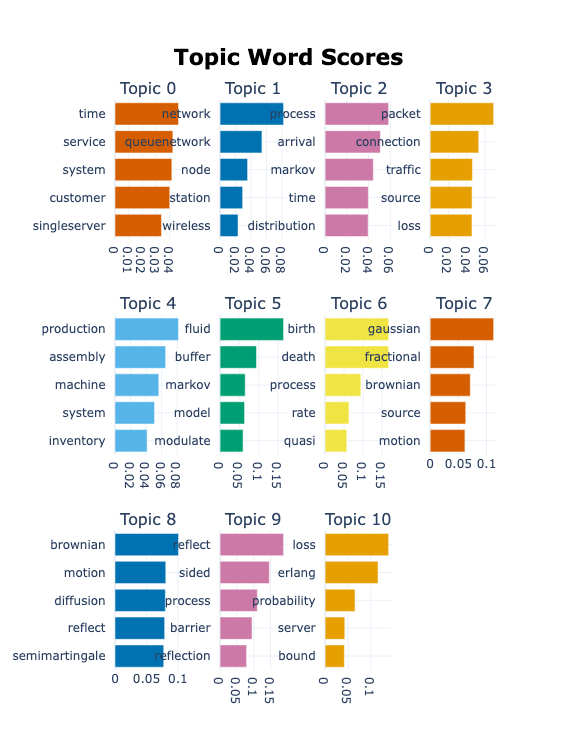

In [144]:
# visualise the most frequent 9 topics
topic_model.visualize_barchart(top_n_topics = 11)  #height=200
#fig = topic_model.visualize_barchart(custom_labels=True)
#fig

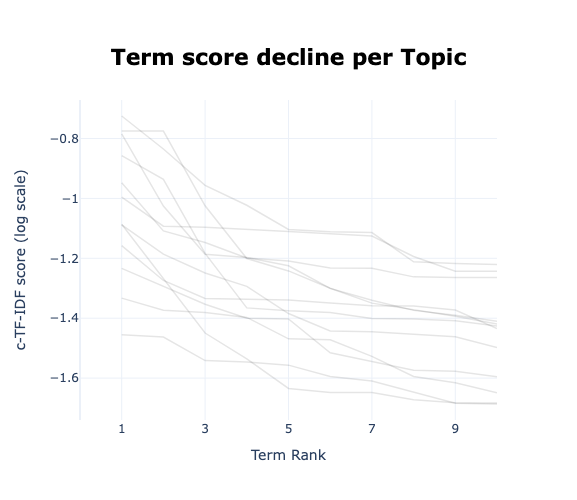

In [110]:
#check how many words are needed to have a sufficient topic representation

topic_model.visualize_term_rank(log_scale =True)


## Visualize similarity of topics

use a 2D representation of topics to Check uniqueness of topics.  This uses UMAP to reduce topics. The distance between topics show similarities between them. However, to get a better understanding, use topic hierarchy plot and similarity matrix.

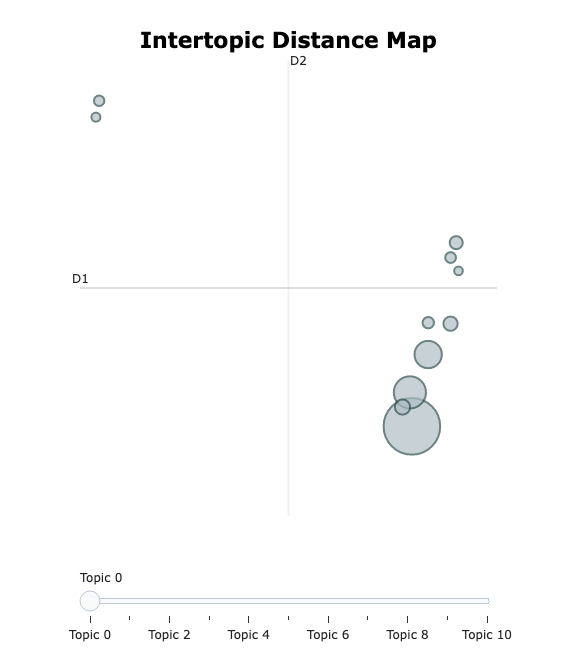

In [93]:
topic_model.visualize_topics()  

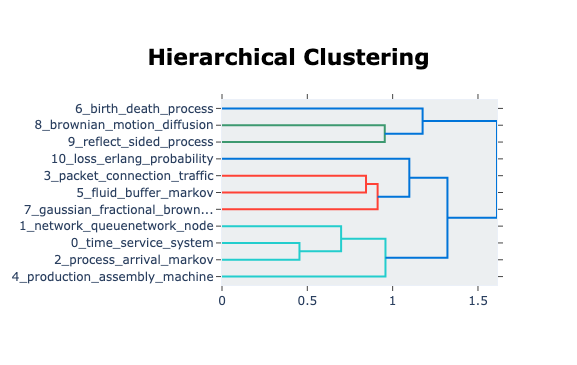

In [95]:
#visualise topic hierarchy. This gives better idea of how similar topics are
topic_model.visualize_hierarchy(width=800, height = 500)

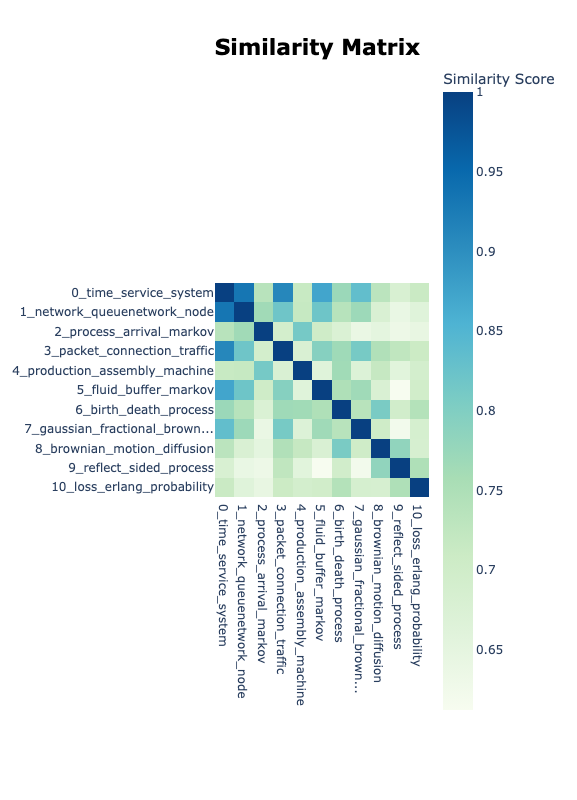

In [142]:
#similarity matrix
topic_model.visualize_heatmap()

The blocky structure in the heatmap shows topics which are somehow similar. Hover over the blocks shows the similarity score. 

## Visualize documents with topics 

In [221]:
#######from BERTopic visualisation
fig = topic_model.visualize_documents(abstracts, hide_annotations = True,  hide_document_hover=True)

## visualize Topics over time

36it [00:04,  7.91it/s]


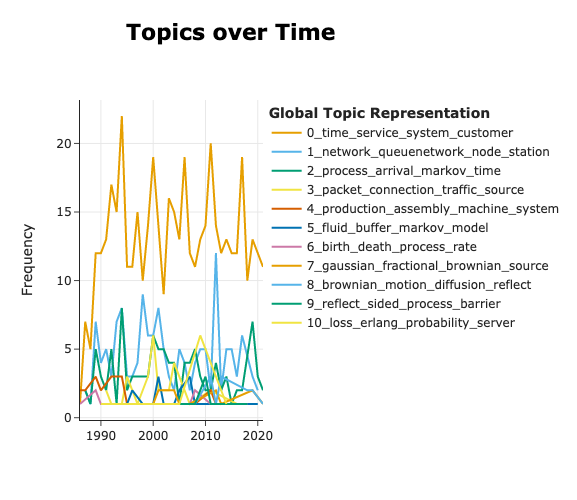

In [152]:
topics_over_time = topic_model.topics_over_time(abstracts,  timestamps)
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=11, width=900, height=500)

In [156]:

topics_over_time.to_csv(path + '/results/df_topics_over_time.csv', index = False)

## Search for topics given a specific word

Search for the topics that are  similar to an input serch term, and extract the most similar topic and check results

In [5]:
#search for topics similar to a given word
similar_topics, similarity = topic_model.find_topics("tandem", top_n=6)   

topic_model.get_topic(similar_topics[0])


## Compute and visualize probabilities of topics in a document


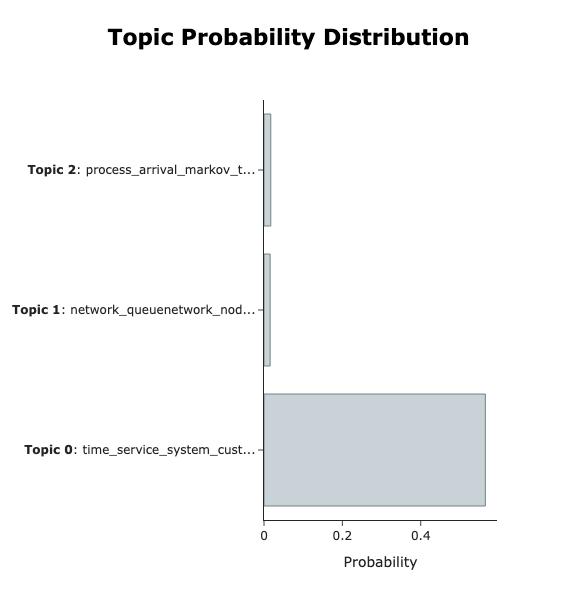

In [197]:
topic_model.visualize_distribution(probs[0])


In [6]:
#convert probabilities array into dataframe and save the probabilities


df_probs = pd.DataFrame(probs, 
                        columns = ['Topic_1','Topic_2','Topic_3', 'Topic_4','Topic_5','Topic_6',
                                         'Topic_7','Topic_8','Topic_9', 'Topic_10','Topic_11']
                       )

#compute maximum probabilities in each row and add it to max_prob column
df_probs['max prob'] = pd.DataFrame({'max': df_probs.max(axis=1)})

#add topic number to each document
lst_topics = topics
df_probs['Topic'] = lst_topics

df_probs.to_csv('/results/df_probs_topics.csv', index = False)

## Save  mode

In [7]:

# dump(topic_model, "/results/abstract_topics_model_two_Oct11.joblib")

## Load previously saved model

In [ ]:
#to load the model use (if model was saved using save() function):
# topic_model = BERTopic.load('/results/abstract_topics_model_Oct11') #if model was savednormal load